## MIAD - Deep Learning - Miniproyecto - Grupo 09

### Librerías

In [1]:
# Librerías generales para el análisis de datos 
import os                             # Manejo de archivos y directorios
import pandas as pd                   # Manipulación de datos
import numpy as np                    # Cálculos numéricos
import matplotlib.pyplot as plt       # Visualización de datos
import seaborn as sns                 # Visualización de datos

In [2]:
# Librerías para el preprocesamiento y modelado
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

In [3]:
# Librerías para el modelado con TensorFlow/Keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras import models
from keras.models import Sequential
from scikeras.wrappers import KerasClassifier
from tensorflow.keras.regularizers import l2

In [4]:
# Librerías para modelos clásicos de machine learning
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

### Carga de datos

In [5]:
# Lectura del archivo de entrenamiento (train)
df = pd.read_csv('spam_train.csv')
print ("El tamaño del dataset es: ", df.shape)
df.info()

El tamaño del dataset es:  (3001, 59)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3001 entries, 0 to 3000
Data columns (total 59 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      3001 non-null   int64  
 1   V1      3001 non-null   float64
 2   V2      3001 non-null   float64
 3   V3      3001 non-null   float64
 4   V4      3001 non-null   float64
 5   V5      3001 non-null   float64
 6   V6      3001 non-null   float64
 7   V7      3001 non-null   float64
 8   V8      3001 non-null   float64
 9   V9      3001 non-null   float64
 10  V10     3001 non-null   float64
 11  V11     3001 non-null   float64
 12  V12     3001 non-null   float64
 13  V13     3001 non-null   float64
 14  V14     3001 non-null   float64
 15  V15     3001 non-null   float64
 16  V16     3001 non-null   float64
 17  V17     3001 non-null   float64
 18  V18     3001 non-null   float64
 19  V19     3001 non-null   float64
 20  V20     3001 non-null   float64
 21 

### Entendimiento de los datos

In [6]:
print("La variable objetivo cuenta con:" + str(df["V58"].unique()) + "valores únicos.")

# Aislamiento de variables predictoras y objetivo
X = df.drop(columns=["ID", "V58"])
y = df["V58"]

La variable objetivo cuenta con:[1 0]valores únicos.


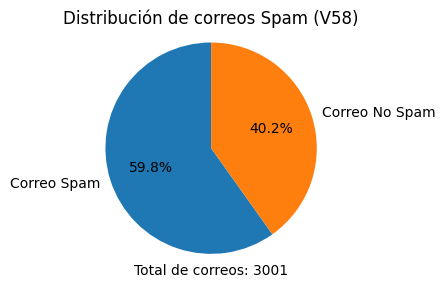

In [7]:
#  Distribución de la variable objetivo
counts = df['V58'].value_counts(dropna=False)
total = counts.sum()

# Gráfica circular
labels = ["Correo Spam", "Correo No Spam"]
plt.figure(figsize=(3, 3))
plt.pie(
    counts,
    labels=labels,
    autopct="%1.1f%%",
    startangle=90
)

# Diseño gráfico
plt.title("Distribución de correos Spam (V58)")
plt.text(0, -1.2,f"Total de correos: {total}",ha="center",fontsize=10)
plt.axis("equal")
plt.show()

In [8]:
# Estadística descriptiva de las variables numéricas
X.describe().T

,count,mean,std,min,25%,50%,75%,max
V1,3001.0,0.098570,0.339230,0.000,0.000,0.000,0.000,6.060
V2,3001.0,0.216348,1.300497,0.000,0.000,0.000,0.000,14.280
V3,3001.0,0.280920,0.497393,0.000,0.000,0.000,0.430,5.100
V4,3001.0,0.088704,1.700779,0.000,0.000,0.000,0.000,42.810
V5,3001.0,0.322706,0.706823,0.000,0.000,0.000,0.400,10.000
V6,3001.0,0.150202,0.272827,0.000,0.000,0.054,0.192,3.609
V7,3001.0,0.112929,0.377867,0.000,0.000,0.000,0.000,7.270
V8,3001.0,0.111876,0.323354,0.000,0.000,0.000,0.000,4.340
V9,3001.0,0.161871,0.556893,0.036,0.036,0.036,0.036,9.126
V10,3001.0,0.251036,0.698606,0.000,0.000,0.000,0.170,18.180


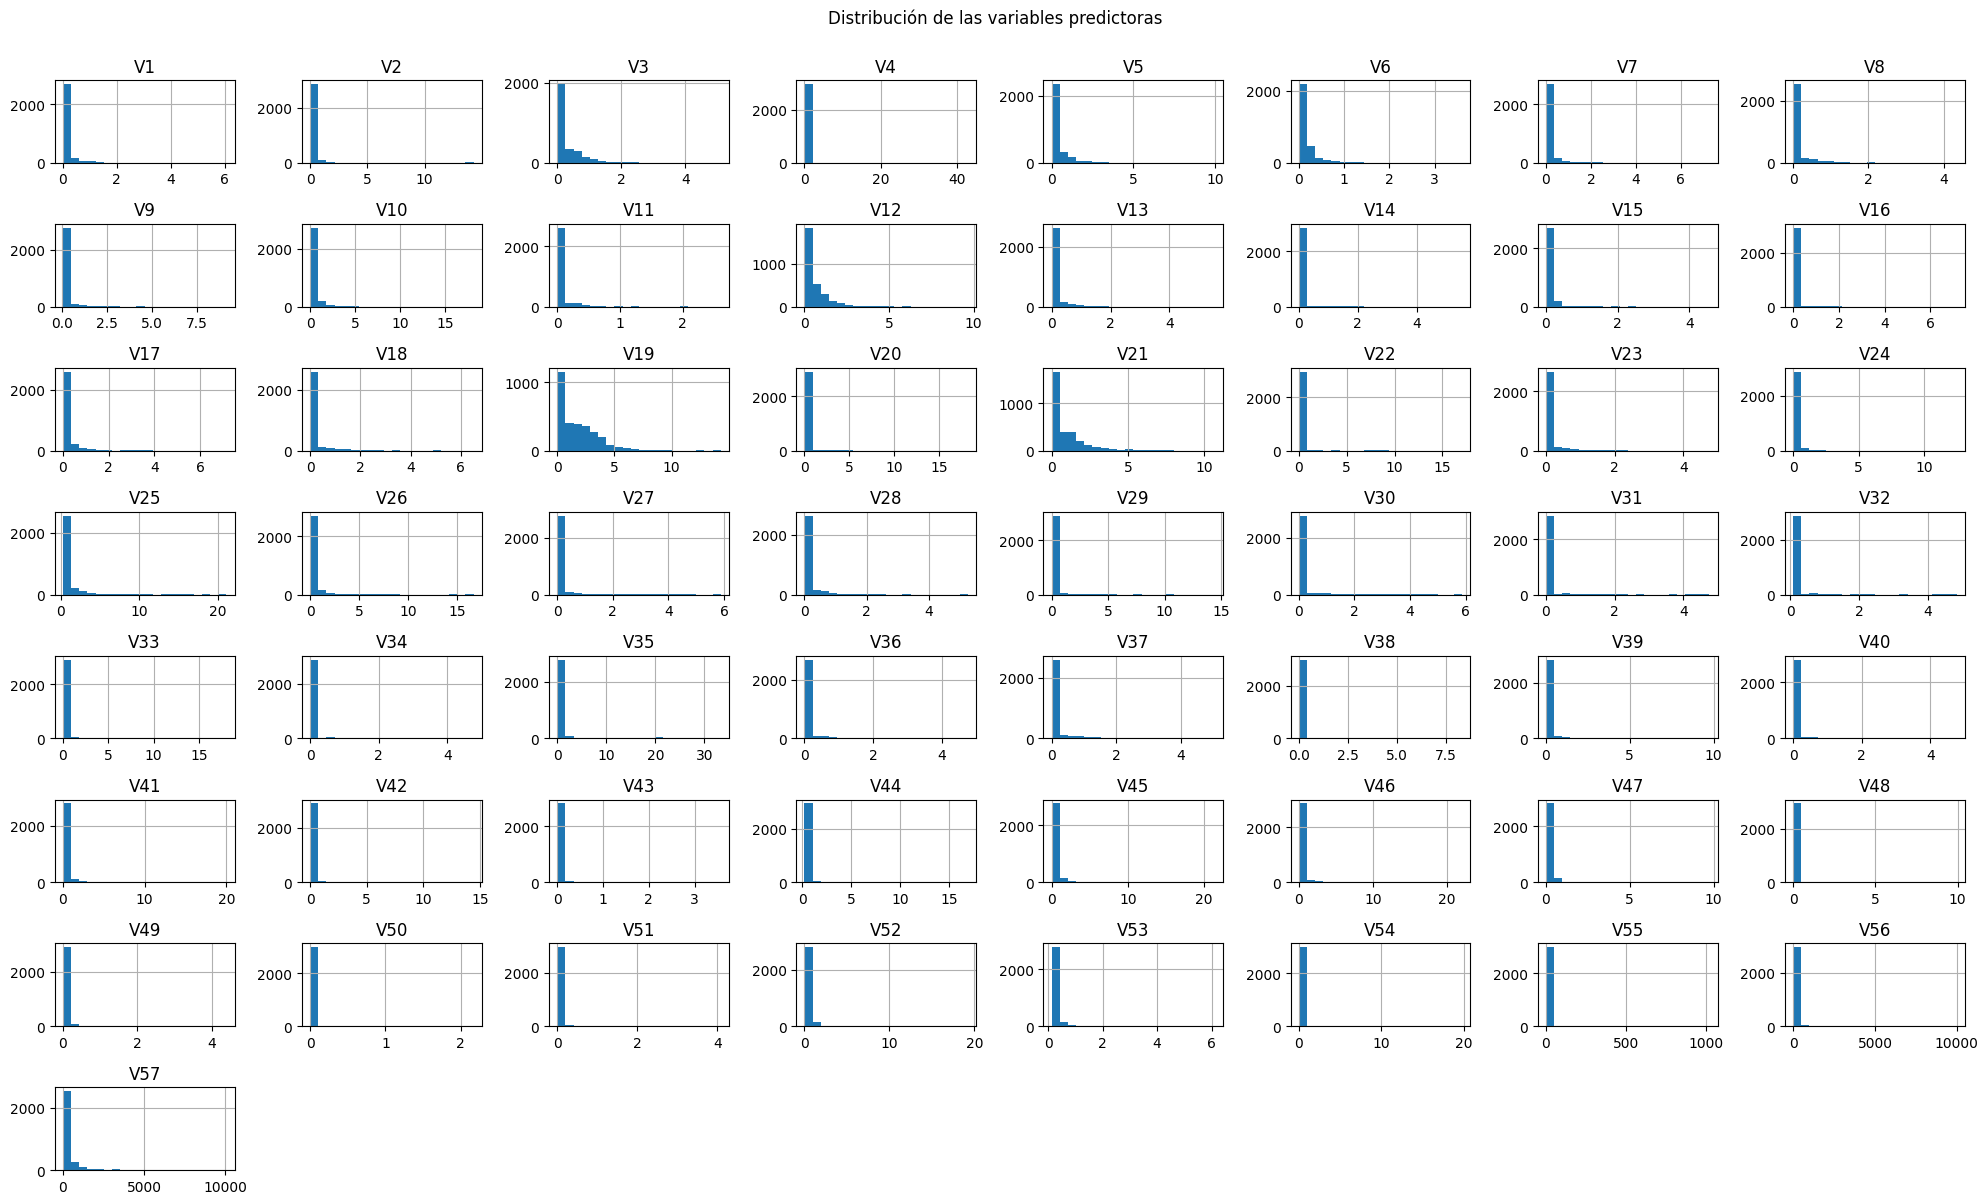

In [9]:
# Análisis de la distribución de las variables predictoras
X.hist(figsize=(20,12), bins=20)
plt.suptitle("Distribución de las variables predictoras", y=1.0)
plt.tight_layout()
plt.show()

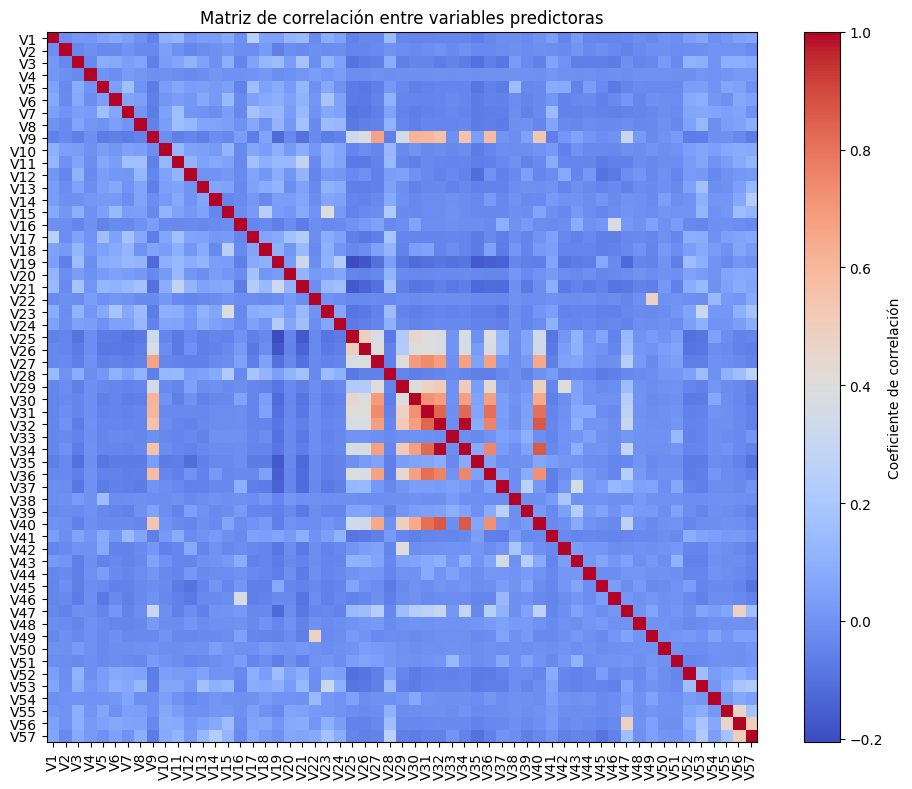

In [10]:
# Matirz de correlación variables predictoras
corr = X.corr()

# Heatmap de la matriz de correlación
plt.figure(figsize=(10, 8))
plt.imshow(corr, cmap="coolwarm", interpolation="nearest")
plt.colorbar(label="Coeficiente de correlación")

# Etiquetas
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)

# Título
plt.title("Matriz de correlación entre variables predictoras")
plt.tight_layout()
plt.show()

#### Resultados del entendimiento de datos

* Calidad y estructura de los datos:
    No se identificaron valores faltantes, lo que indica una base limpia y lista para modelado sin necesidad de imputación. Las variables predictoras (V1–V57) son numéricas, lo cual facilita su uso directo en modelos de aprendizaje automático, particularmente en:

    - Modelos lineales (Logistic Regression)
    - Modelos basados en árboles (Random Forest, Gradient Boosting)
    - Máquinas de soporte vectorial (SVM)
    - Redes neuronales (MLP)

    No obstante, aunque las variables son numéricas, requieren escalado previo, especialmente para modelos sensibles a magnitudes como redes neuronales y SVM. El tamaño de la base de entrenamiento es mediano, esto implica que es suficientemente grande para modelos clásicos robustos y adecuado para redes neuronales pequeñas.

* Variable objetivo y balance de clases:
    La variable objetivo (V58) corresponde a la clasificación de correos electrónicos en:

    - 1.796 correos legítimos (59,85%)
    - 1.205 correos spam (40,15%)

    Se trata de un problema de clasificación binaria con desbalance moderado, no extremo. Este nivel de desbalance:

    - No invalida el uso de accuracy como métrica inicial,
    - Pero requiere complementar la evaluación con: Precision, Recall, F1-score, ROC-AUC.

    En problemas de spam, el costo de error no es simétrico: clasificar spam como legítimo puede ser más crítico dependiendo del contexto operativo.

* Distribución de predictores:
    El análisis univariado revela un patrón típico de variables basadas en frecuencias:

    - Alta asimetría positiva (sesgo a la derecha)
    - Mediana igual a cero en múltiples variables
    - Concentración de masa en valores bajos
    - Presencia de colas largas
    - Valores extremos en variables como V55, V56 y V57

    La mayoría de los correos no contienen ciertos términos o caracteres específicos (frecuencia cero), pero cuando estos aparecen, pueden hacerlo con intensidades significativamente variables. Este comportamiento es característico de representaciones basadas en frecuencia de términos. Teniendo en cuenta estos resultados, se podria utilizar un transformacion logaritmica para reducir asimetria. 

    La matriz de correlación muestra que existen predictores que se mueven casi en bloque, con correlaciones muy altas entre algunas variables (V25 a V37). Esto sugiere redundancia y colinealidad en ciertos grupos de términos. En conjunto, la exploración confirma que el dataset contiene patrones claros asociados a spam, pero también presenta asimetrías marcadas y variables parcialmente redundantes, lo que respalda el uso de modelos con capacidad de capturar relaciones no lineales y de manejar interacciones entre predictores.

### Modelamiento de los datos

#### Seleccion del modelo

El análisis exploratorio evidenció asimetrías marcadas y correlaciones elevadas entre algunos predictores, lo que sugiere la presencia de interacciones complejas. Por ello, también se consideran modelos no lineales como Random Forest, SVM y Redes Neuronales, los cuales tienen mayor capacidad para capturar patrones no lineales y dependencias entre variables. Desde una perspectiva organizacional, estos modelos representan un balance entre precisión predictiva y viabilidad operativa, permitiendo implementar un sistema automatizado de filtrado que reduzca riesgos asociados a correos maliciosos sin afectar significativamente los mensajes legítimos.

##### Division de los datos y escalado

In [11]:
# División train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y # Estratificación para mantener la proporción de clases en ambos conjuntos
)

X_train = np.log1p(X_train)
X_test = np.log1p(X_test)

# Escalamiento
scaler = RobustScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##### Modelo 01 - Logistic regression

In [12]:
log_model = LogisticRegression(max_iter=1000)

log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)
y_prob_log = log_model.predict_proba(X_test)[:, 1]

print("=== Logistic Regression ===")
print(classification_report(y_test, y_pred_log))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_log))


=== Logistic Regression ===
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       539
           1       0.93      0.91      0.92       362

    accuracy                           0.94       901
   macro avg       0.94      0.93      0.94       901
weighted avg       0.94      0.94      0.94       901

ROC-AUC: 0.9786488176385572


##### Modelo 02 - Random Forest

In [13]:
rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42
)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

print("=== Random Forest ===")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_rf))


=== Random Forest ===
              precision    recall  f1-score   support

           0       0.94      0.97      0.96       539
           1       0.96      0.91      0.93       362

    accuracy                           0.95       901
   macro avg       0.95      0.94      0.94       901
weighted avg       0.95      0.95      0.95       901

ROC-AUC: 0.9814061234740002


In [ ]:
# Datos de test
test_df = pd.read_csv("spam_test.csv")
sample_sub = pd.read_csv("sample_submission.csv")  # (opcional, para validar estructura)

X_kaggle = test_df.drop(columns=["ID"])
X_kaggle = X_kaggle.reindex(columns=X.columns)
X_kaggle = X_kaggle.fillna(0)

X_kaggle = np.log1p(X_kaggle)
X_kaggle_scaled = scaler.transform(X_kaggle)

# Predicciones
proba = rf_model.predict(X_kaggle_scaled).ravel()
pred_label = (proba >= 0.5).astype(int)

# Crear sarchivo de salida
submission = pd.DataFrame({
    "ID": test_df["ID"].values,
    "Label": pred_label
})

# Guardar archivo final
submission.to_csv("submission.csv", index=False)
submission.head()

##### Modelo 03 - Red nueronal

In [14]:
model = keras.Sequential([
    layers.Dense(16, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.2),
    layers.Dense(8, activation='relu'),
    layers.Dense(4, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

early_stop = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=100,
    batch_size=32,
    callbacks=[early_stop],
    verbose=1
)

y_prob_nn = model.predict(X_test).ravel()
y_pred_nn = (y_prob_nn >= 0.5).astype(int)

print("=== Neural Network ===")
print(classification_report(y_test, y_pred_nn))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_nn))

Epoch 1/100


c:\Users\CYBER\Documents\Maestria MIAD\Maestria-MIAD\Machine Learning MIAD\Deep Learning\.venv\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


53/53 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5351 - loss: 0.7034 - val_accuracy: 0.6548 - val_loss: 0.6853
Epoch 2/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6690 - loss: 0.6839 - val_accuracy: 0.7238 - val_loss: 0.6714
Epoch 3/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7185 - loss: 0.6634 - val_accuracy: 0.7619 - val_loss: 0.6414
Epoch 4/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7625 - loss: 0.6303 - val_accuracy: 0.8071 - val_loss: 0.5986
Epoch 5/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8190 - loss: 0.5790 - val_accuracy: 0.8667 - val_loss: 0.5354
Epoch 6/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8530 - loss: 0.5152 - val_accuracy: 0.8857 - val_loss: 0.4527
Epoch 7/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8792 - loss: 0.4136 - val_accuracy: 0.8857 - val_loss: 0.3491
Epoch 8/100
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8958 - loss: 0.3212 - val_accuracy: 0.8929 - val_loss: 0.2

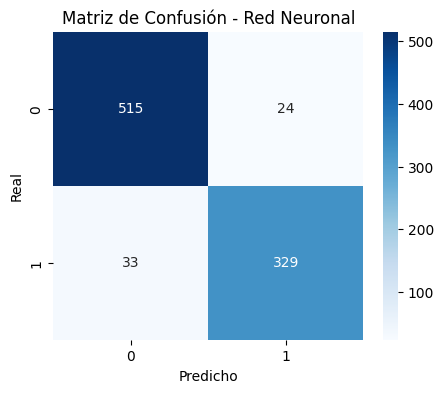

In [15]:
cm = confusion_matrix(y_test, y_pred_nn)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión - Red Neuronal")
plt.ylabel("Real")
plt.xlabel("Predicho")
plt.show()

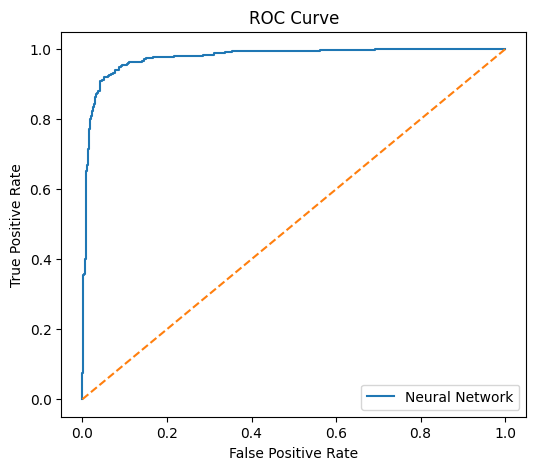

In [16]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob_nn)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label="Neural Network")
plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [17]:
# Datos de test
test_df = pd.read_csv("spam_test.csv")
sample_sub = pd.read_csv("sample_submission.csv")  # (opcional, para validar estructura)

X_kaggle = test_df.drop(columns=["ID"])
X_kaggle = X_kaggle.reindex(columns=X.columns)
X_kaggle = X_kaggle.fillna(0)

X_kaggle = np.log1p(X_kaggle)
X_kaggle_scaled = scaler.transform(X_kaggle)

# Predicciones
proba = model.predict(X_kaggle_scaled, verbose=0).ravel()
pred_label = (proba >= 0.5).astype(int)

# Crear sarchivo de salida
submission = pd.DataFrame({
    "ID": test_df["ID"].values,
    "Label": pred_label
})

# Guardar archivo final
submission.to_csv("submission.csv", index=False)
submission.head()

,ID,Label
0,1147,1
1,2299,0
2,2839,1
3,52,1
4,4507,0


##### Modelo 04 - Red neuronal calibrada

In [24]:
def create_model(
    neurons1=16,
    neurons2=8,
    dropout_rate=0.2,
    learning_rate=0.001,
    l2_lambda=0.0
):
    
    model = keras.Sequential([
        layers.Dense(
            neurons1,
            activation='relu',
            kernel_regularizer=l2(l2_lambda),
            input_shape=(X_train.shape[1],)
        ),
        layers.Dropout(dropout_rate),
        layers.Dense(
            neurons2,
            activation='relu',
            kernel_regularizer=l2(l2_lambda)
        ),
        layers.Dense(1, activation='sigmoid')
    ])
    
    model.compile(
        optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
        loss='binary_crossentropy',
        metrics=['accuracy']
    )
    
    return model

In [37]:
model = KerasClassifier(
    model=create_model,
    verbose=0,
    epochs=100,
    batch_size=32
)

In [38]:
param_dist = {
    "model__neurons1": [8, 16, 32, 64],
    "model__neurons2": [4, 8, 16],
    "model__dropout_rate": [0.1, 0.2, 0.3, 0.4],
    "model__learning_rate": [0.0005, 0.001, 0.005],
    "model__l2_lambda": [0.0, 0.001, 0.01],
    "batch_size": [16, 32, 64]
}

random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=20,                 # número de combinaciones aleatorias
    cv=3,
    scoring="roc_auc",
    verbose=1,
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_train, y_train)

print("Mejores parámetros (Randomized):")
print(random_search.best_params_)


Fitting 3 folds for each of 20 candidates, totalling 60 fits


c:\Users\CYBER\Documents\Maestria MIAD\Maestria-MIAD\Machine Learning MIAD\Deep Learning\.venv\lib\site-packages\sklearn\model_selection\_search.py:1135: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]
  warnings.warn(
c:\Users\CYBER\Documents\Maestria MIAD\Maestria-MIAD\Machine Learning MIAD\Deep Learning\.venv\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Mejores parámetros (Randomized):
{'model__neurons2': 8, 'model__neurons1': 64, 'model__learning_rate': 0.001, 'model__l2_lambda': 0.001, 'model__dropout_rate': 0.2, 'batch_size': 32}


In [39]:
best_random_model = random_search.best_estimator_

y_prob_random = best_random_model.predict_proba(X_test)[:, 1]
y_pred_random = (y_prob_random >= 0.5).astype(int)

print("=== Neural Network (Random Search) ===")
print(classification_report(y_test, y_pred_random))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_random))


=== Neural Network (Random Search) ===
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       539
           1       0.93      0.88      0.91       362

    accuracy                           0.93       901
   macro avg       0.93      0.92      0.92       901
weighted avg       0.93      0.93      0.93       901

ROC-AUC: 0.973282833977388


In [40]:
param_grid = {
    "model__neurons1": [16, 32],
    "model__neurons2": [8, 16],
    "model__dropout_rate": [0.2, 0.3],
    "model__learning_rate": [0.001, 0.0005],
    "batch_size": [32, 64]
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=3,
    scoring="roc_auc",
    verbose=1,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Mejores parámetros (Grid):")
print(grid_search.best_params_)


Fitting 3 folds for each of 32 candidates, totalling 96 fits


c:\Users\CYBER\Documents\Maestria MIAD\Maestria-MIAD\Machine Learning MIAD\Deep Learning\.venv\lib\site-packages\joblib\externals\loky\process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
c:\Users\CYBER\Documents\Maestria MIAD\Maestria-MIAD\Machine Learning MIAD\Deep Learning\.venv\lib\site-packages\sklearn\model_selection\_search.py:1135: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(
c:\Users\CYBER\Documents\Maestria MIAD\Maestria-MIAD\Machine Learning MIAD\Deep Learning\.venv\lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the 

Mejores parámetros (Grid):
{'batch_size': 32, 'model__dropout_rate': 0.2, 'model__learning_rate': 0.001, 'model__neurons1': 16, 'model__neurons2': 8}


In [41]:
best_grid_model = grid_search.best_estimator_

y_prob_grid = best_grid_model.predict_proba(X_test)[:, 1]
y_pred_grid = (y_prob_grid >= 0.5).astype(int)

print("=== Neural Network (Grid Search) ===")
print(classification_report(y_test, y_pred_grid))
print("ROC-AUC:", roc_auc_score(y_test, y_prob_grid))


=== Neural Network (Grid Search) ===
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       539
           1       0.93      0.92      0.93       362

    accuracy                           0.94       901
   macro avg       0.94      0.94      0.94       901
weighted avg       0.94      0.94      0.94       901

ROC-AUC: 0.9782285591283223


### Resultados

In [43]:
def extract_metrics(y_true, y_pred, y_prob):
    report = classification_report(y_true, y_pred, output_dict=True)
    
    return {
        "Accuracy": report["accuracy"],
        "Precision (Spam)": report["1"]["precision"],
        "Recall (Spam)": report["1"]["recall"],
        "F1-Score (Spam)": report["1"]["f1-score"],
        "ROC-AUC": roc_auc_score(y_true, y_prob)
    }

results = pd.DataFrame({
    "Logistic Regression": extract_metrics(y_test, y_pred_log, y_prob_log),
    "Random Forest": extract_metrics(y_test, y_pred_rf, y_prob_rf),
    "NN Baseline": extract_metrics(y_test, y_pred_nn, y_prob_nn),
    "NN Random Search": extract_metrics(y_test, y_pred_random, y_prob_random),
    "NN Grid Search": extract_metrics(y_test, y_pred_grid, y_prob_grid),
}).T

results

,Accuracy,Precision (Spam),Recall (Spam),F1-Score (Spam),ROC-AUC
Logistic Regression,0.937847,0.929775,0.914365,0.922006,0.978649
Random Forest,0.946726,0.959064,0.906077,0.931818,0.981406
NN Baseline,0.936737,0.932011,0.908840,0.920280,0.976681
NN Random Search,0.926748,0.930233,0.883978,0.906516,0.973283
NN Grid Search,0.941176,0.932773,0.919890,0.926287,0.978229


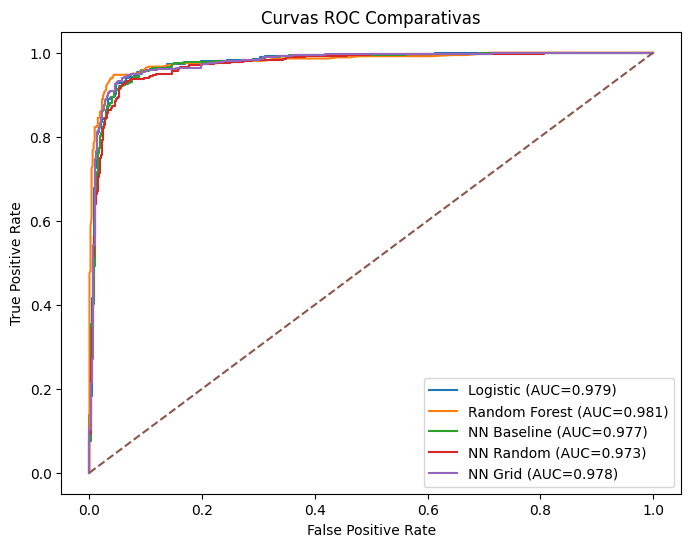

In [45]:
plt.figure(figsize=(8,6))

models_probs = {
    "Logistic": y_prob_log,
    "Random Forest": y_prob_rf,
    "NN Baseline": y_prob_nn,
    "NN Random": y_prob_random,
    "NN Grid": y_prob_grid
}

for name, probs in models_probs.items():
    fpr, tpr, _ = roc_curve(y_test, probs)
    auc = roc_auc_score(y_test, probs)
    plt.plot(fpr, tpr, label=f"{name} (AUC={auc:.3f})")

plt.plot([0,1], [0,1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Curvas ROC Comparativas")
plt.legend()
plt.show()


Se realizó un análisis de los resultados con el objetivo de evaluar si es posible predecir anticipadamente si un correo electrónico corresponde a spam o a un mensaje legítimo. Los modelos implementados mostraron un desempeño sólido, con métricas elevadas de accuracy, F1-score y especialmente ROC-AUC, lo que evidencia una adecuada capacidad de discriminación entre ambas clases. La información contenida en las variables predictoras —principalmente frecuencias de palabras y caracteres— demuestra capturar patrones relevantes asociados al comportamiento típico del spam.

En la comparación de modelos, aquellos con mayor capacidad para capturar relaciones no lineales, como Random Forest y las redes neuronales calibradas, presentaron un mejor desempeño frente a los modelos lineales base. La optimización de hiperparámetros contribuyó a mejorar la generalización y reducir el riesgo de sobreajuste. En conjunto, los resultados confirman que sí es posible anticipar con alto nivel de precisión si un correo es no deseado, validando el uso de técnicas de aprendizaje automático como herramientas efectivas para sistemas de filtrado de spam.